### Implement a PsuedoCode RNN

In [1]:
import numpy as np

timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))

state_t = np.zeros((output_features,))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []
for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)

    successive_outputs.append(output_t)

    state_t = output_t

final_output_sequence = np.concatenate(successive_outputs, axis=0)
print(final_output_sequence)

[ 0.99999877  1.          0.99999995 ...,  1.          1.          1.        ]


In [2]:
from util import print_curves

Using TensorFlow backend.


### SimpleRNN

In [3]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Embedding

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [4]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [5]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


### Try on IMDB Dataset

In [6]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

Loading data...


In [7]:
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

In [8]:
y_train[0]

1

In [9]:
from keras.layers import Dense

model = Sequential()
# input length not required because RNN between Flatten / Dense?
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=batch_size,
    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 110s 5ms/step - loss: 0.5777 - acc: 0.6723 - val_loss: 0.4243 - val_acc: 0.8146
Epoch 2/10
20000/20000 [==============================] - 111s 6ms/step - loss: 0.3506 - acc: 0.8550 - val_loss: 0.4248 - val_acc: 0.8054
Epoch 3/10
20000/20000 [==============================] - 111s 6ms/step - loss: 0.2906 - acc: 0.8840 - val_loss: 0.3415 - val_acc: 0.8606
Epoch 4/10
20000/20000 [==============================] - 110s 5ms/step - loss: 0.2437 - acc: 0.9050 - val_loss: 0.3636 - val_acc: 0.8502
Epoch 5/10
20000/20000 [==============================] - 109s 5ms/step - loss: 0.2019 - acc: 0.9242 - val_loss: 0.4809 - val_acc: 0.8154
Epoch 6/10
20000/20000 [==============================] - 106s 5ms/step - loss: 0.1861 - acc: 0.9302 - val_loss: 0.4119 - val_acc: 0.8546
Epoch 7/10
20000/20000 [==============================] - 106s 5ms/step - loss: 0.1672 - acc: 0.9396 - val_loss: 0.4894 - v

Max Val Acc: 0.8606
Min Val Loss: 0.341538555908


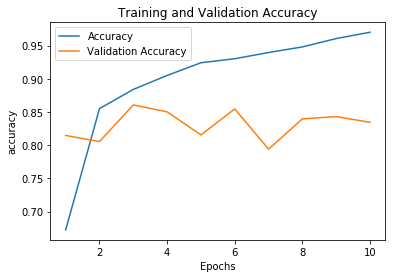

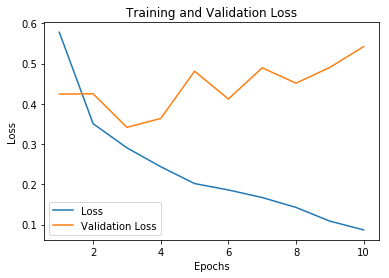

In [11]:
print_curves(history)

Validation peaked at 87%, not bad considering we're throwing away all words after 500

### LSTM, preferred over SimplerRNN

In [12]:
from keras.layers import LSTM

model = Sequential()
# input length not required because RNN between Flatten / Dense?
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 456s 23ms/step - loss: 0.4185 - acc: 0.8117 - val_loss: 0.2886 - val_acc: 0.8830
Epoch 2/10
20000/20000 [==============================] - 459s 23ms/step - loss: 0.2662 - acc: 0.8987 - val_loss: 0.6812 - val_acc: 0.7544
Epoch 3/10
20000/20000 [==============================] - 458s 23ms/step - loss: 0.2206 - acc: 0.9178 - val_loss: 0.2890 - val_acc: 0.8804
Epoch 4/10
20000/20000 [==============================] - 444s 22ms/step - loss: 0.1965 - acc: 0.9276 - val_loss: 0.3698 - val_acc: 0.8708
Epoch 5/10
20000/20000 [==============================] - 451s 23ms/step - loss: 0.1785 - acc: 0.9340 - val_loss: 0.2723 - val_acc: 0.8902
Epoch 6/10
20000/20000 [==============================] - 444s 22ms/step - loss: 0.1655 - acc: 0.9399 - val_loss: 0.2833 - val_acc: 0.8930
Epoch 7/10
20000/20000 [==============================] - 458s 23ms/step - loss: 0.1566 - acc: 0.9441 - val_loss: 0.3

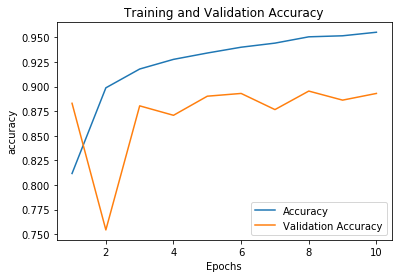

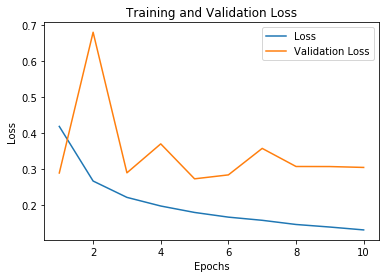

In [13]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=batch_size,
    validation_split=0.2)

model.save('./models/imdb_25k_lstm.h5')

print_curves(history)

In [14]:
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 107s 4ms/step


[0.35668477712631225, 0.87336000000000003]